# Project Model Overview

## Steps in Our Model

---
* Normalize data across seasons
* Find 10 most similar player seasons historically
* Rank and weight each of those 10 players season stats
* Look at 10 players following seasons stats
* Use weighted averages to predict current players next season
* Rinse and repeat for every player in 2017-18
---

# Cleaning Our NBA Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # matplotlib along with seaborne plotting graphs in JN.
%matplotlib inline

In [5]:
stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [6]:
# Using Pandas we read in per game data from csv folder.
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [7]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [8]:
df.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10623,201163,2018-19,51.0,31.0,23.1,2.2,5.4,0.418,1.2,3.1,...,0.4,0.5,0.720,0.9,3.3,1.6,0.9,0.5,0.4,6.0
10624,1628999,2018-19,2.0,22.0,6.5,0.5,2.0,0.250,0.0,0.5,...,0.0,0.0,0.000,0.5,1.0,0.0,0.0,0.5,0.0,1.0
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7
10629,1629155,2018-19,1.0,26.0,3.8,0.0,1.0,0.000,0.0,1.0,...,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10630,2585,2018-19,68.0,35.0,12.9,1.3,2.8,0.440,0.0,0.1,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
10631,1629015,2018-19,6.0,19.0,18.4,2.3,5.7,0.412,1.0,2.7,...,1.0,1.3,0.750,0.5,1.7,1.7,1.0,0.3,0.3,6.7
10632,1627753,2018-19,1.0,23.0,1.0,1.0,1.0,1.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10607,1626145,2018-19,68.0,22.0,22.9,2.7,6.6,0.415,0.6,1.9,...,0.9,1.0,0.841,0.3,1.6,4.8,0.7,1.2,0.1,6.9
4649,101130,2006-07,81.0,21.0,18.6,2.8,5.4,0.516,0.0,0.0,...,0.6,1.0,0.649,1.1,3.0,0.6,1.0,0.5,0.6,6.2
7881,203120,2013-14,8.0,24.0,9.0,1.1,2.5,0.450,0.4,1.1,...,0.6,0.6,1.000,0.5,0.4,0.0,0.5,0.6,0.0,3.3
10173,1628449,2018-19,28.0,26.0,5.8,1.2,2.7,0.447,0.4,1.3,...,0.5,0.5,0.867,0.6,1.4,0.1,0.3,0.2,0.9,3.3
9044,202699,2015-16,76.0,23.0,33.1,5.5,11.7,0.469,1.1,3.1,...,2.7,3.2,0.831,1.3,5.4,2.2,1.4,0.9,0.5,14.7
6645,1495,2010-11,76.0,35.0,28.4,5.5,11.0,0.500,0.0,0.1,...,2.4,3.4,0.716,2.2,6.7,2.7,1.6,0.7,1.9,13.4
6237,201582,2010-11,34.0,23.0,10.0,1.7,3.9,0.444,0.4,1.0,...,0.4,0.5,0.722,0.5,1.8,0.3,0.5,0.3,0.6,4.2
7481,201578,2012-13,79.0,25.0,16.5,3.3,7.4,0.445,0.0,0.1,...,1.7,2.2,0.771,1.8,3.0,0.6,1.0,0.3,0.7,8.3
5278,1513,2007-08,22.0,33.0,7.9,0.5,1.0,0.522,0.0,0.0,...,0.7,1.0,0.682,0.6,1.0,0.1,0.2,0.1,0.3,1.8
6690,101161,2011-12,64.0,25.0,24.3,3.1,5.3,0.576,0.0,0.1,...,0.9,1.3,0.690,2.3,4.0,1.2,1.5,0.5,1.1,7.1


In [10]:
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [11]:
df_cleaned = df.dropna(how='all') # delete all rows in which each col contains NaN
# 2nd param: axis=1 -> delete all columns in which each row contains NaN

In [12]:
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [13]:
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std() * 3)

In [14]:
min_gp

np.float64(-22.712012335693153)

<Axes: >

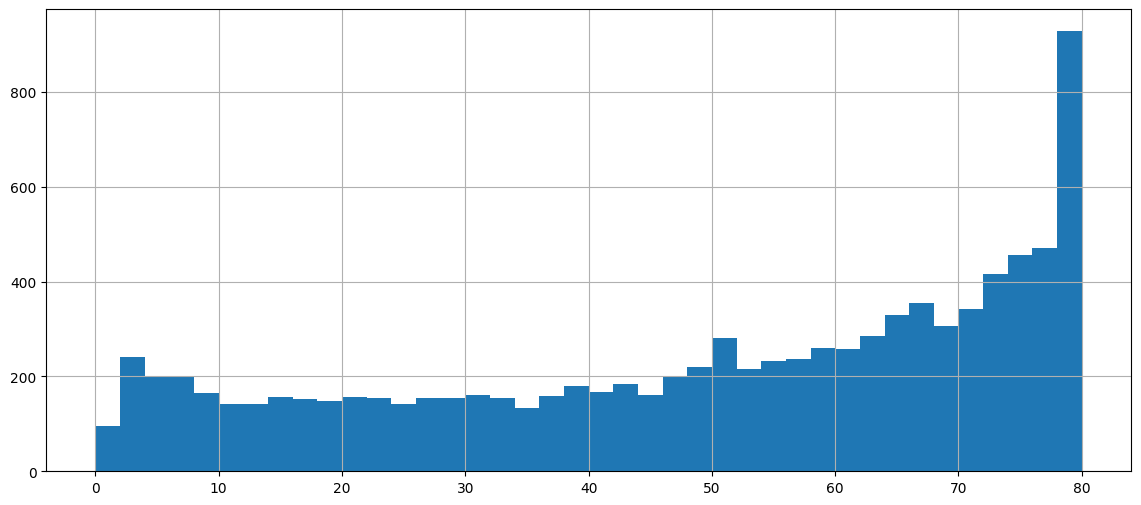

In [15]:
bin_values = np.arange(start=0, stop=82, step=2)
df_cleaned['gp'].hist(bins=bin_values, figsize=[14,6])
# Histogram of games played in our data frame 

In [16]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [17]:
x = df_cleaned['player_id'].count()
y = df_filter['player_id'].count()
print(x-y)

971


# Normalizing Data Across Seasons

In [18]:
season = df_filter['season_id'] == '2017-18'

In [19]:
df_2018 = df_filter[season]

In [20]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10041,201152,2017-18,81.0,30.0,32.2,5.2,10.7,0.487,0.7,2.2,...,0.7,1.1,0.598,2.3,4.0,1.9,1.3,1.7,0.4,11.8
9941,1628462,2017-18,45.0,31.0,25.2,3.4,8.0,0.419,2.0,5.2,...,0.9,1.0,0.848,0.4,2.4,4.6,2.2,0.5,0.1,9.5
9923,201578,2017-18,52.0,30.0,13.0,2.7,6.7,0.395,1.7,4.5,...,0.8,1.1,0.727,0.4,2.2,0.8,0.8,0.2,0.4,7.7
9811,204060,2017-18,82.0,30.0,31.4,4.1,8.8,0.467,2.5,5.7,...,0.8,1.0,0.795,0.3,3.9,4.8,1.9,1.1,0.2,11.5
9734,1627834,2017-18,17.0,20.0,7.2,1.1,2.5,0.429,0.0,0.0,...,0.0,0.0,0.000,0.8,1.4,0.5,0.5,0.2,0.4,2.1
9697,1717,2017-18,77.0,40.0,24.7,4.5,9.8,0.456,1.8,4.4,...,1.3,1.4,0.898,0.3,5.4,1.6,0.7,0.6,0.6,12.0
9827,1628371,2017-18,27.0,20.0,19.8,2.0,5.4,0.379,0.6,1.7,...,0.7,0.9,0.760,0.6,3.1,0.7,1.0,1.2,1.1,5.4
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.3,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4
9748,101133,2017-18,77.0,31.0,14.9,1.8,3.2,0.556,0.0,0.0,...,1.2,1.7,0.703,1.8,2.3,0.7,1.3,0.5,0.5,4.8
9978,201988,2017-18,82.0,29.0,25.7,3.4,8.3,0.411,1.9,5.0,...,1.3,1.4,0.890,0.3,1.6,2.8,1.3,0.7,0.1,10.0


In [21]:
df_2018['pts_normalized'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4776\3801605567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_normalized'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())


In [22]:
df_2018.sort_values('pts_normalized', ascending=False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_normalized
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [23]:
# We can find each player by his id in: https://www.nba.com/stats/player/ + [player_id]

In [24]:
def normalize(col):
    #df_2018['pts_normalized'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())
    #df_2018['fgm_normalized'] = (df_2018['fgm'] - df_2018['fgm'].min()) / (df_2018['fgm'].max() - df_2018['fgm'].min())
    #df_2018['ast_normalized'] = (df_2018['ast'] - df_2018['ast'].min()) / (df_2018['ast'].max() - df_2018['ast'].min())
    return (col - col.min()) / (col.max() - col.min())

In [25]:
normalize(df_2018['pts'])

9563     0.060201
9564     0.571906
9567     0.083612
9569     0.414716
9570     0.217391
           ...   
10098    0.130435
10099    0.541806
10100    0.468227
10101    0.163880
10102    0.023411
Name: pts, Length: 463, dtype: float64

In [26]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [27]:
normalize(df_2018['ast'])

9563     0.058252
9564     0.223301
9567     0.048544
9569     0.456311
9570     0.077670
           ...   
10098    0.077670
10099    0.291262
10100    0.213592
10101    0.155340
10102    0.009709
Name: ast, Length: 463, dtype: float64

In [28]:
cols_to_normalize = stats

In [29]:
def vorp(df): # Value Of Replacement Player
    for col_name in cols_to_normalize:
        df.loc[:, f"{col_name}_normalize"] = normalize(df[col_name])
    return df

In [30]:
df_2018_normalized = vorp(df_2018)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4776\428088967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"{col_name}_normalize"] = normalize(df[col_name])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4776\428088967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"{col_name}_normalize"] = normalize(df[col_name])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4776\428088967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [31]:
df_2018_normalized.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_normalize,fg3a_normalize,ftm_normalize,fta_normalize,oreb_normalize,dreb_normalize,ast_normalize,stl_normalize,tov_normalize,blk_normalize
9970,203490,2017-18,77.0,25.0,31.6,5.8,11.5,0.503,1.8,4.1,...,0.428571,0.41,0.160920,0.168317,0.254902,0.457944,0.194175,0.625000,0.20,0.192308
9853,1626157,2017-18,82.0,22.0,35.6,7.8,14.3,0.545,1.5,3.5,...,0.357143,0.35,0.482759,0.485149,0.568627,0.859813,0.233010,0.333333,0.38,0.538462
9871,1627739,2017-18,52.0,24.0,29.3,5.5,12.8,0.429,0.8,2.6,...,0.190476,0.26,0.183908,0.217822,0.098039,0.336449,0.582524,0.833333,0.58,0.192308
9773,1627751,2017-18,82.0,22.0,18.6,3.1,4.7,0.659,0.0,0.0,...,0.000000,0.00,0.080460,0.118812,0.392157,0.242991,0.067961,0.208333,0.20,0.461538
9969,201956,2017-18,53.0,30.0,14.0,2.3,3.9,0.580,0.2,0.4,...,0.047619,0.04,0.103448,0.128713,0.117647,0.280374,0.097087,0.125000,0.14,0.153846
9633,1627767,2017-18,52.0,21.0,11.2,2.0,3.4,0.580,0.0,0.0,...,0.000000,0.00,0.114943,0.128713,0.176471,0.280374,0.038835,0.083333,0.10,0.153846
10049,202699,2017-18,80.0,25.0,33.3,7.0,15.3,0.460,2.3,5.6,...,0.547619,0.56,0.252874,0.267327,0.137255,0.420561,0.233010,0.375000,0.26,0.153846
9745,202355,2017-18,54.0,29.0,25.3,5.8,10.7,0.540,0.0,0.0,...,0.000000,0.00,0.275862,0.336634,0.627451,0.747664,0.097087,0.291667,0.34,0.653846
9581,101161,2017-18,74.0,31.0,15.8,1.9,3.5,0.538,0.1,0.4,...,0.023810,0.04,0.080460,0.108911,0.333333,0.242991,0.155340,0.250000,0.14,0.230769
9758,1627826,2017-18,43.0,21.0,9.5,1.4,2.8,0.500,0.0,0.0,...,0.000000,0.00,0.103448,0.118812,0.196078,0.149533,0.058252,0.083333,0.12,0.115385


In [32]:
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [33]:
df_new = df_filter.groupby(['season_id']).apply(vorp)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4776\556466379.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new = df_filter.groupby(['season_id']).apply(vorp)


In [34]:
df_new.sample(10)

player_id season_id    gp   age   min  fgm   fga  fg_pct  \
season_id                                                                   
2018-19   10490     203917   2018-19  68.0  25.0  14.9  2.0   5.0   0.402   
2006-07   4571        2248   2006-07  77.0  28.0  27.9  3.4   8.9   0.383   
          4718        1548   2006-07  82.0  31.0  31.0  5.2  10.2   0.509   
1996-97   129          690   1996-97  47.0  23.0  10.3  1.1   2.4   0.482   
2006-07   4758        2403   2006-07  64.0  24.0  26.8  4.6   8.1   0.570   
2004-05   3586        2365   2004-05  67.0  26.0  21.3  2.9   5.3   0.534   
2015-16   8876      203123   2015-16  26.0  25.0  11.3  0.9   2.5   0.364   
2002-03   2899        1938   2002-03  69.0  25.0  20.8  2.5   5.8   0.438   
2013-14   8015      203133   2013-14  53.0  25.0  12.4  1.3   3.3   0.379   
2005-06   4007      101194   2005-06  16.0  23.0   5.5  0.9   1.9   0.452   

                 fg3m  fg3a  ...  fg3m_normalize  fg3a_normalize  \
season_id                    ...                                   
2018-19   10490   1.0   2.8  ...        0.196078        0.212121   
2006-07   4571    1.2   3.6  ...        0.400000        0.444444   
          4718    0.1   0.4  ...        0.033333        0.049383   
1996-97   129     0.0   0.0  ...        0.000000        0.000000   
2006-07   4758    0.0   0.0  ...        0.000000        0.000000   
2004-05   3586    0.0   0.0  ...        0.000000        0.000000   
2015-16   8876    0.4   1.2  ...        0.078431        0.107143   
2002-03   2899    0.7   2.1  ...        0.269231        0.280000   
2013-14   8015    0.6   1.7  ...        0.181818        0.215190   
2005-06   4007    0.3   0.6  ...        0.088235        0.071429   

                 ftm_normalize  fta_normalize  oreb_normalize  dreb_normalize  \
season_id                                                                       
2018-19   10490       0.082474       0.081818        0.055556        0.136364   
2006-07   4571        0.151163       0.173077        0.090909        0.168317   
          4718        0.197674       0.221154        0.386364        0.415842   
1996-97   129         0.078125       0.074468        0.135593        0.120000   
2006-07   4758        0.337209       0.413462        0.522727        0.435644   
2004-05   3586        0.229885       0.266667        0.512821        0.384615   
2015-16   8876        0.034091       0.049020        0.061224        0.090000   
2002-03   2899        0.233766       0.231481        0.152174        0.133929   
2013-14   8015        0.034483       0.030303        0.129630        0.170213   
2005-06   4007        0.010638       0.008696        0.000000        0.040404   

                 ast_normalize  stl_normalize  tov_normalize  blk_normalize  
season_id                                                                    
2018-19   10490       0.112150       0.136364       0.160000       0.037037  
2006-07   4571        0.491379       0.619048       0.512195       0.090909  
          4718        0.068966       0.238095       0.439024       0.212121  
1996-97   129         0.026316       0.111111       0.113636       0.088235  
2006-07   4758        0.103448       0.476190       0.463415       0.272727  
2004-05   3586        0.095652       0.068966       0.217391       0.454545  
2015-16   8876        0.051282       0.238095       0.173913       0.054054  
2002-03   2899        0.224719       0.518519       0.361111       0.062500  
2013-14   8015        0.037383       0.120000       0.027027       0.000000  
2005-06   4007        0.028571       0.040000       0.054054       0.000000  

[10 rows x 35 columns]

# Player Distance Function

In [35]:
def calc_distance(u, v):
    distance = np.sqrt(np.sum((u - v)**2))
    return distance

In [36]:
df1 = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [37]:
df2 = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', usecols=['player_id', 'season_id', 'pts'])

In [38]:
df1.sample(5)

,player_id,player_name
392,203496,Robert Covington
45,1626171,Bobby Portis
389,2210,Richard Jefferson
321,2440,Matt Barnes
315,202693,Markieff Morris


In [39]:
df2.sample(5)

,player_id,season_id,pts
8099,201961,2013-14,3.2
4245,283,2005-06,2.9
6660,200748,2010-11,10.2
1218,1725,1998-99,4.0
6264,202340,2010-11,1.7


In [40]:
df3 = pd.merge(df1, df2, on='player_id', how='left')

In [41]:
df3.sample(5)

,player_id,player_name,season_id,pts
2757,202704,Reggie Jackson,2014-15,14.5
3231,203504,Trey Burke,2015-16,10.6
894,1717,Dirk Nowitzki,2014-15,17.3
165,101106,Andrew Bogut,2005-06,9.4
3175,2754,Tony Allen,2014-15,8.6


In [42]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [43]:
df_2019.sample(10)

,player_id,player_name,season_id,pts
754,1627761,DeAndre' Bembry,2018-19,8.4
2295,203090,Maurice Harkless,2018-19,7.7
907,202700,Donatas Motiejunas,2018-19,2.0
102,203459,Allen Crabbe,2018-19,9.6
1009,202339,Eric Bledsoe,2018-19,15.9
901,1627734,Domantas Sabonis,2018-19,14.1
2972,2733,Shaun Livingston,2018-19,4.0
1850,203484,Kentavious Caldwell-Pope,2018-19,11.4
2233,202693,Markieff Morris,2018-19,9.4
1773,1626147,Justin Anderson,2018-19,3.7


In [44]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
steph_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [45]:
dame_ppg = dame_df.pts.tolist()[0]
steph_ppg = steph_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [46]:
calc_distance(dame_ppg, steph_ppg) # the order of params don't change the result

np.float64(1.5)

In [47]:
calc_distance(dame_ppg, rudy_ppg)

np.float64(9.9)

In [48]:
calc_distance(steph_ppg, rudy_ppg)

np.float64(11.4)

# Find Player Function

In [49]:
nba_stats = {
    'first_name': ['Jaylen','Jayson','Jrue','Derrick','Al'],
    'last_name': ['Brown','Tatum','Holiday','White','Horford'],
    'ppg': [28.2, 30.3, 14.1, 12.5, 7.8],
    'apg': [5.2, 6.1, 4.4, 4.5, 1.5],
    'rpg': [6.0, 8.4, 4.9, 3.7, 6.1]
}
celtics_df = pd.DataFrame(nba_stats, columns = ['first_name','last_name','ppg','apg','rpg'])

In [50]:
for row in celtics_df.itertuples():
    print(row.first_name, row.last_name, row.ppg)

Jaylen Brown 28.2
Jayson Tatum 30.3
Jrue Holiday 14.1
Derrick White 12.5
Al Horford 7.8


In [51]:
# read in per game data form csv folder
dataframe = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [52]:
df_example = dataframe.sample(10)

In [53]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

2003-04 2673
2010-11 201575
2014-15 2037
2003-04 2399
2017-18 203943
2003-04 1500
2017-18 1627737
2006-07 947
2007-08 2037
2003-04 436


In [54]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [55]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
3229,2673,2003-04,4.0,23.0,10.6,0.8,2.0,0.375,0.0,0.0,...,0.5,1.5,0.333,1.0,1.8,0.5,1.0,0.0,0.3,2.0
6278,201575,2010-11,67.0,25.0,26.2,3.2,7.7,0.421,1.4,3.3,...,1.2,1.6,0.755,0.5,2.7,0.9,1.0,0.6,0.5,9.1
8306,2037,2014-15,64.0,35.0,26.6,5.2,13.1,0.396,1.9,5.7,...,3.5,3.9,0.901,0.3,1.7,2.5,1.4,0.9,0.2,15.8
3364,2399,2003-04,75.0,23.0,31.2,4.3,9.6,0.449,1.3,3.4,...,1.8,2.5,0.741,1.2,4.7,2.9,1.9,0.9,0.2,11.7
9963,203943,2017-18,54.0,22.0,16.2,1.9,4.3,0.444,0.4,1.2,...,0.7,1.1,0.621,1.3,4.5,0.6,0.6,0.4,0.3,4.9
3424,1500,2003-04,39.0,28.0,13.3,2.3,5.4,0.427,0.1,0.2,...,0.3,0.4,0.765,0.3,1.0,0.6,0.7,0.4,0.1,5.0
9921,1627737,2017-18,72.0,20.0,21.2,2.8,6.6,0.423,0.8,2.6,...,1.3,2.2,0.608,1.1,4.4,1.2,1.5,0.7,1.0,7.7
4443,947,2006-07,65.0,32.0,42.5,8.9,20.2,0.442,1.0,3.0,...,7.5,9.4,0.795,0.4,2.6,7.2,4.1,1.9,0.2,26.3
5072,2037,2007-08,80.0,28.0,39.9,7.1,17.4,0.410,2.2,6.2,...,4.1,4.8,0.864,0.5,2.1,5.0,2.4,1.0,0.2,20.6
3285,436,2003-04,81.0,31.0,35.6,6.5,14.4,0.453,0.0,0.0,...,3.9,4.9,0.809,2.1,4.9,2.0,2.2,0.7,0.3,17.0


In [56]:
find_player(1504, '2001-02')

In [57]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [58]:
dataframe.dtypes # show the type of each field in the DF

player_id      int64
season_id     object
gp           float64
age          float64
min          float64
fgm          float64
fga          float64
fg_pct       float64
fg3m         float64
fg3a         float64
fg3_pct      float64
ftm          float64
fta          float64
ft_pct       float64
oreb         float64
dreb         float64
ast          float64
tov          float64
stl          float64
blk          float64
pts          float64
dtype: object

In [59]:
player = 2544 # Lebron James
season = '2012-13'

In [60]:
find_player(dataframe, player, season)

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calculating Player Similarity

In [61]:
current_player_season = '2016-17'
current_player_id = 201950

In [62]:
# read in per game data from csv folder
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [63]:
df_cleaned = df.dropna(how='all')

In [64]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [65]:
cols_to_normalize = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [66]:
def vorp(df):
    for col_name in cols_to_normalize:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [67]:
df_norm = df_filter.groupby(['season_id']).apply(vorp)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4776\1214020351.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_norm = df_filter.groupby(['season_id']).apply(vorp)


In [68]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item()

In [69]:
jrue_pts_norm

0.474025974025974

In [70]:
# We normalize only 3 fields but we can normalize all fields we need inside the array
jrue_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item()
]

In [71]:
print(jrue_player_stats)

[0.474025974025974, 0.8530259365994238, 0.6486486486486487]


In [72]:
current_player_vector = np.array(jrue_player_stats)

In [73]:
current_player_vector

array([0.47402597, 0.85302594, 0.64864865])

In [74]:
compared_player_season = '2013-14'
compared_player_id = 203077

In [75]:
mkg_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ast_norm']).item()
]

In [76]:
compared_player_vector = np.array(mkg_player_stats)

In [77]:
compared_player_vector

array([0.21766562, 0.59833795, 0.07476636])

In [78]:
vfunc = np.vectorize(calc_distance)

In [79]:
distance_vect = vfunc(current_player_vector, compared_player_vector)

In [80]:
distance_vect # We obtained the distance between each field for our 2 example players.
# [a1 b1] - [a2 b2] = [(a1-a2), (b1-b2), (c1-c2), (d1-d2)]
# [c1 d1]   [c2 d2]

array([0.25636036, 0.25468799, 0.57388229])

In [81]:
number = np.sum(np.abs(distance_vect) / len(distance_vect))

In [82]:
number # This number measures the similarity in these 3 fields [pts,min,ast] between jrue and mkg.

np.float64(0.36164354628446654)

# Comparing Multiple Players in a For Loop

In [107]:
player_distance = []

In [108]:
df_sample = df_norm.sample(10)

In [109]:
df_sample.head(10)

,,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
season_id,,,,,,,,,,,,,,,,,,,,,,
2010-11,6354,2734,2010-11,71.0,28.0,31.7,4.8,11.5,0.422,0.8,2.5,...,0.333333,0.396825,0.618421,0.487179,0.044444,0.173077,0.622807,0.416667,0.743590,0.038462
2006-07,4888,2585,2006-07,72.0,23.0,28.1,4.0,8.5,0.474,0.0,0.0,...,0.000000,0.000000,0.465116,0.490385,0.636364,0.386139,0.129310,0.523810,0.536585,0.151515
1997-98,824,70,1997-98,50.0,32.0,22.3,2.7,6.0,0.454,1.1,2.6,...,0.478261,0.440678,0.115385,0.087719,0.044118,0.123711,0.180952,0.192308,0.114286,0.027027
2006-07,4536,2443,2006-07,37.0,29.0,18.9,3.2,6.1,0.524,0.0,0.1,...,0.000000,0.012346,0.127907,0.134615,0.272727,0.207921,0.086207,0.238095,0.268293,0.090909
2003-04,3108,2411,2003-04,45.0,23.0,11.3,1.0,2.9,0.356,0.5,1.4,...,0.166667,0.160920,0.069444,0.059406,0.043478,0.120370,0.076087,0.125000,0.093023,0.083333
2000-01,2170,1503,2000-01,77.0,22.0,40.2,10.2,22.4,0.457,0.8,2.2,...,0.296296,0.297297,0.674699,0.580153,0.609756,0.521739,0.469388,0.583333,0.634146,0.405405
2006-07,4609,2866,2006-07,11.0,22.0,9.3,1.5,3.2,0.457,0.0,0.0,...,0.000000,0.000000,0.081395,0.076923,0.113636,0.118812,0.043103,0.095238,0.195122,0.000000
2012-13,7433,2550,2012-13,60.0,32.0,29.4,2.7,7.0,0.377,1.2,3.0,...,0.342857,0.389610,0.139535,0.156863,0.054545,0.215686,0.468468,0.458333,0.435897,0.133333
2002-03,2859,1908,2002-03,80.0,24.0,27.5,3.9,8.9,0.434,1.4,3.9,...,0.538462,0.520000,0.090909,0.092593,0.282609,0.312500,0.157303,0.296296,0.333333,0.093750


In [110]:
# We will nest all rows from our previous example
for row in df_sample.itertuples():
    compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.ast_norm
    ])
    
    vfunc = np.vectorize(calc_distance)
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    number = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(number)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(round(1 - number, 1)))

Done with 2734. Percent error was 0.9
Done with 2585. Percent error was 0.7
Done with 70. Percent error was 0.7
Done with 2443. Percent error was 0.6
Done with 2411. Percent error was 0.5
Done with 1503. Percent error was 0.8
Done with 2866. Percent error was 0.4
Done with 2550. Percent error was 0.8
Done with 1908. Percent error was 0.7
Done with 1626184. Percent error was 0.6


In [111]:
player_distance

[np.float64(0.05923840086041987),
 np.float64(0.28079220488182727),
 np.float64(0.3445115812895982),
 np.float64(0.42345700524555613),
 np.float64(0.5214462750104955),
 np.float64(0.2215310840038338),
 np.float64(0.5620225160053931),
 np.float64(0.16795024412719506),
 np.float64(0.3003259377099093),
 np.float64(0.4338245096120776)]

In [120]:
df_sample['distance'] = player_distance # the shorter the distance the better

In [127]:
ranked_df = df_sample.sort_values('distance')

In [121]:
ranked_df.head(10)

,,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
season_id,,,,,,,,,,,,,,,,,,,,,,
2010-11,6354,2734,2010-11,71.0,28.0,31.7,4.8,11.5,0.422,0.8,2.5,...,0.396825,0.618421,0.487179,0.044444,0.173077,0.622807,0.416667,0.743590,0.038462,0.059238
2012-13,7433,2550,2012-13,60.0,32.0,29.4,2.7,7.0,0.377,1.2,3.0,...,0.389610,0.139535,0.156863,0.054545,0.215686,0.468468,0.458333,0.435897,0.133333,0.167950
2000-01,2170,1503,2000-01,77.0,22.0,40.2,10.2,22.4,0.457,0.8,2.2,...,0.297297,0.674699,0.580153,0.609756,0.521739,0.469388,0.583333,0.634146,0.405405,0.221531
2006-07,4888,2585,2006-07,72.0,23.0,28.1,4.0,8.5,0.474,0.0,0.0,...,0.000000,0.465116,0.490385,0.636364,0.386139,0.129310,0.523810,0.536585,0.151515,0.280792
2002-03,2859,1908,2002-03,80.0,24.0,27.5,3.9,8.9,0.434,1.4,3.9,...,0.520000,0.090909,0.092593,0.282609,0.312500,0.157303,0.296296,0.333333,0.093750,0.300326
1997-98,824,70,1997-98,50.0,32.0,22.3,2.7,6.0,0.454,1.1,2.6,...,0.440678,0.115385,0.087719,0.044118,0.123711,0.180952,0.192308,0.114286,0.027027,0.344512
2006-07,4536,2443,2006-07,37.0,29.0,18.9,3.2,6.1,0.524,0.0,0.1,...,0.012346,0.127907,0.134615,0.272727,0.207921,0.086207,0.238095,0.268293,0.090909,0.423457
2018-19,10170,1626184,2018-19,49.0,26.0,15.2,1.9,4.4,0.419,0.9,2.3,...,0.174242,0.092784,0.118182,0.037037,0.072727,0.186916,0.227273,0.180000,0.037037,0.433825
2003-04,3108,2411,2003-04,45.0,23.0,11.3,1.0,2.9,0.356,0.5,1.4,...,0.160920,0.069444,0.059406,0.043478,0.120370,0.076087,0.125000,0.093023,0.083333,0.521446


In [128]:
import pandas as pd

In [130]:
df1 = pd.read_csv('../nba-stats-csv/player_info.csv')

In [139]:
df_final = pd.merge(ranked_df, df1, on=['player_id'], how='left').drop_duplicates()

In [140]:
df_final = df_final[['player_name', 'player_id', 'distance']]

In [141]:
df_final

,player_name,player_id,distance
0,Devin Harris,2734,0.059238
1,Devin Harris,2734,0.059238
2,Devin Harris,2734,0.059238
3,Devin Harris,2734,0.059238
4,Devin Harris,2734,0.059238
...,...,...,...
243,Bostjan Nachbar,2411,0.521446
244,Bostjan Nachbar,2411,0.521446
257,Jackie Butler,2866,0.562023
258,Jackie Butler,2866,0.562023
